# Step 1 and 2 

Epoch 1/10, Train Loss: 2.2979, Val Loss: 2.0079, Train Acc: 9.72%, Val Acc: 43.19%
Epoch 2/10, Train Loss: 2.0044, Val Loss: 1.4552, Train Acc: 42.93%, Val Acc: 53.66%
Epoch 3/10, Train Loss: 1.4503, Val Loss: 1.2883, Train Acc: 53.59%, Val Acc: 63.16%
Epoch 4/10, Train Loss: 1.2908, Val Loss: 0.9216, Train Acc: 63.20%, Val Acc: 69.42%
Epoch 5/10, Train Loss: 0.9172, Val Loss: 0.8433, Train Acc: 69.51%, Val Acc: 65.59%
Epoch 6/10, Train Loss: 0.8340, Val Loss: 0.6916, Train Acc: 66.53%, Val Acc: 76.04%
Epoch 7/10, Train Loss: 0.6910, Val Loss: 0.6606, Train Acc: 76.11%, Val Acc: 76.29%
Epoch 8/10, Train Loss: 0.6557, Val Loss: 0.5128, Train Acc: 76.11%, Val Acc: 84.37%
Epoch 9/10, Train Loss: 0.5113, Val Loss: 0.5165, Train Acc: 84.38%, Val Acc: 83.04%
Epoch 10/10, Train Loss: 0.5183, Val Loss: 0.4722, Train Acc: 83.02%, Val Acc: 85.06%


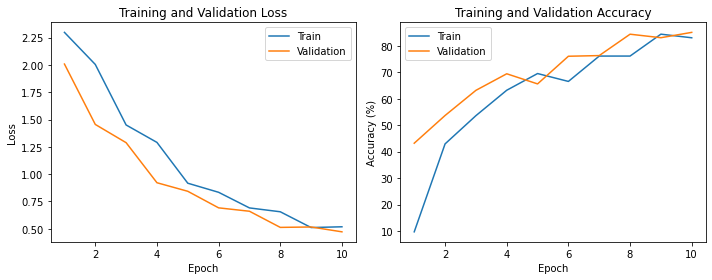

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Task 1: Data Preparation
data_path = "C:\\Users\\meton\\Downloads\\mnist_train.csv\\mnist_train.csv"
data = pd.read_csv(data_path)

# Extract features and labels
features = data.iloc[:, 1:].values / 255.0  # Normalize pixel values between 0 and 1
labels = data.iloc[:, 0].values

# Perform any necessary pre-processing steps on the dataset here

# Randomly split the data into training and validation sets
train_features, val_features, train_labels, val_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
train_features = torch.Tensor(train_features)
train_labels = torch.Tensor(train_labels).long()
val_features = torch.Tensor(val_features)
val_labels = torch.Tensor(val_labels).long()

# Task 2: Neural Network Architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Define the model architecture
input_size = train_features.shape[1]
hidden_size1 = 256  # Customize the number of perceptrons in each hidden layer
hidden_size2 = 128
output_size = 10  # Assuming there are 10 classes in the MNIST dataset

model = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

# Task 2: Training the Model
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Training loop
num_epochs = 10
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

for epoch in range(num_epochs):
    train_loss = 0.0
    train_total = 0
    train_correct = 0

    # Training phase
    model.train()
    optimizer.zero_grad()
    outputs = model(train_features)
    loss = criterion(outputs, train_labels)
    loss.backward()
    optimizer.step()

    train_loss = loss.item()
    _, predicted = torch.max(outputs.data, 1)
    train_total = train_labels.size(0)
    train_correct = (predicted == train_labels).sum().item()

    # Validation phase
    model.eval()
    with torch.no_grad():
        outputs = model(val_features)
        loss = criterion(outputs, val_labels)

        val_loss = loss.item()
        _, predicted = torch.max(outputs.data, 1)
        val_total = val_labels.size(0)
        val_correct = (predicted == val_labels).sum().item()

    # Calculate metrics
    train_accuracy = 100.0 * train_correct / train_total
    val_accuracy = 100.0 * val_correct / val_total

    # Save metrics for plotting
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    train_acc_history.append(train_accuracy)
    val_acc_history.append(val_accuracy)

    # Print progress
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Val Acc: {val_accuracy:.2f}%")

# Plotting the training/validation loss and accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_loss_history, label='Train')
plt.plot(range(1, num_epochs+1), val_loss_history, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_acc_history, label='Train')
plt.plot(range(1, num_epochs+1), val_acc_history, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Step 3

Epoch 1/10, Train Loss: 2.3052, Val Loss: 2.0519, Train Acc: 9.47%, Val Acc: 55.74%
Epoch 2/10, Train Loss: 2.0763, Val Loss: 1.3846, Train Acc: 35.06%, Val Acc: 66.72%
Epoch 3/10, Train Loss: 1.5504, Val Loss: 1.0718, Train Acc: 52.30%, Val Acc: 69.98%
Epoch 4/10, Train Loss: 1.3162, Val Loss: 0.8733, Train Acc: 56.59%, Val Acc: 72.77%
Epoch 5/10, Train Loss: 1.1152, Val Loss: 0.7390, Train Acc: 64.86%, Val Acc: 76.22%
Epoch 6/10, Train Loss: 0.9444, Val Loss: 0.6179, Train Acc: 68.84%, Val Acc: 80.65%
Epoch 7/10, Train Loss: 0.8016, Val Loss: 0.5612, Train Acc: 72.88%, Val Acc: 83.24%
Epoch 8/10, Train Loss: 0.7141, Val Loss: 0.5256, Train Acc: 76.97%, Val Acc: 84.62%
Epoch 9/10, Train Loss: 0.6522, Val Loss: 0.4774, Train Acc: 79.83%, Val Acc: 86.24%
Epoch 10/10, Train Loss: 0.5914, Val Loss: 0.4231, Train Acc: 81.99%, Val Acc: 87.30%


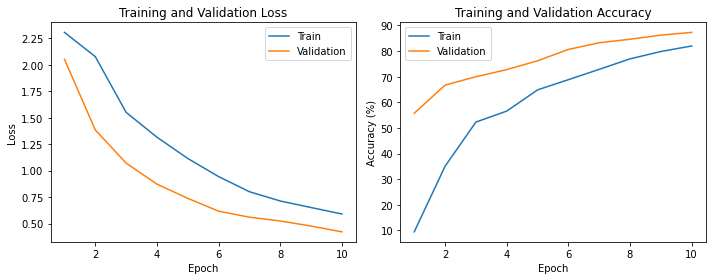

In [31]:
# Task 3: Dropout and Layer Normalization
class ModifiedNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_prob):
        super(ModifiedNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_prob)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Task 3: Retrain the model with Dropout and Layer Normalization
dropout_prob = 0.5  # You can choose the dropout probability based on your preference
modified_model = ModifiedNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size, dropout_prob)

optimizer = optim.Adam(modified_model.parameters(), lr=0.01)

num_epochs = 10

# Training loop
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

for epoch in range(num_epochs):
    train_loss = 0.0
    train_total = 0
    train_correct = 0

    # Training phase
    modified_model.train()
    optimizer.zero_grad()
    outputs = modified_model(train_features)
    loss = criterion(outputs, train_labels)
    loss.backward()
    optimizer.step()

    train_loss = loss.item()
    _, predicted = torch.max(outputs.data, 1)
    train_total = train_labels.size(0)
    train_correct = (predicted == train_labels).sum().item()

    # Validation phase
    modified_model.eval()
    with torch.no_grad():
        outputs = modified_model(val_features)
        loss = criterion(outputs, val_labels)

        val_loss = loss.item()
        _, predicted = torch.max(outputs.data, 1)
        val_total = val_labels.size(0)
        val_correct = (predicted == val_labels).sum().item()

    # Calculate metrics
    train_accuracy = 100.0 * train_correct / train_total
    val_accuracy = 100.0 * val_correct / val_total

    # Save metrics for plotting
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    train_acc_history.append(train_accuracy)
    val_acc_history.append(val_accuracy)

    # Print progress
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Val Acc: {val_accuracy:.2f}%")

# Plotting the training/validation loss and accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_loss_history, label='Train')
plt.plot(range(1, num_epochs+1), val_loss_history, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_acc_history, label='Train')
plt.plot(range(1, num_epochs+1), val_acc_history, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



# Step 4

Model - Learning Rate: 0.001, Dropout: 0.2
Epoch 1/10, Train Loss: 2.3053, Val Loss: 2.2618, Train Acc: 9.22%, Val Acc: 10.15%
Model - Learning Rate: 0.001, Dropout: 0.2
Epoch 2/10, Train Loss: 2.2632, Val Loss: 2.2168, Train Acc: 11.97%, Val Acc: 19.59%
Model - Learning Rate: 0.001, Dropout: 0.2
Epoch 3/10, Train Loss: 2.2193, Val Loss: 2.1631, Train Acc: 20.11%, Val Acc: 36.43%
Model - Learning Rate: 0.001, Dropout: 0.2
Epoch 4/10, Train Loss: 2.1672, Val Loss: 2.0983, Train Acc: 32.49%, Val Acc: 47.71%
Model - Learning Rate: 0.001, Dropout: 0.2
Epoch 5/10, Train Loss: 2.1050, Val Loss: 2.0226, Train Acc: 41.82%, Val Acc: 56.20%
Model - Learning Rate: 0.001, Dropout: 0.2
Epoch 6/10, Train Loss: 2.0318, Val Loss: 1.9379, Train Acc: 49.66%, Val Acc: 62.32%
Model - Learning Rate: 0.001, Dropout: 0.2
Epoch 7/10, Train Loss: 1.9494, Val Loss: 1.8440, Train Acc: 55.82%, Val Acc: 66.25%
Model - Learning Rate: 0.001, Dropout: 0.2
Epoch 8/10, Train Loss: 1.8598, Val Loss: 1.7412, Train Acc: 6

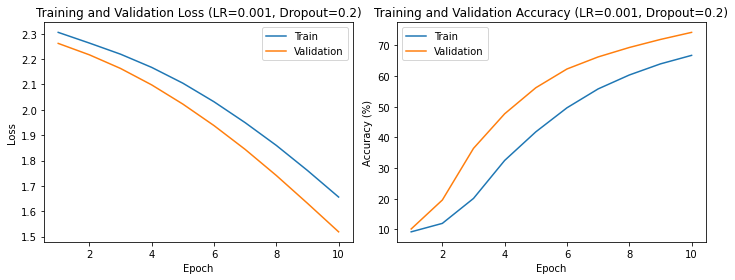

Model - Learning Rate: 0.001, Dropout: 0.4
Epoch 1/10, Train Loss: 2.3065, Val Loss: 2.2635, Train Acc: 10.25%, Val Acc: 21.38%
Model - Learning Rate: 0.001, Dropout: 0.4
Epoch 2/10, Train Loss: 2.2675, Val Loss: 2.2206, Train Acc: 18.45%, Val Acc: 37.67%
Model - Learning Rate: 0.001, Dropout: 0.4
Epoch 3/10, Train Loss: 2.2268, Val Loss: 2.1696, Train Acc: 28.59%, Val Acc: 52.26%
Model - Learning Rate: 0.001, Dropout: 0.4
Epoch 4/10, Train Loss: 2.1791, Val Loss: 2.1073, Train Acc: 38.00%, Val Acc: 60.18%
Model - Learning Rate: 0.001, Dropout: 0.4
Epoch 5/10, Train Loss: 2.1219, Val Loss: 2.0332, Train Acc: 45.58%, Val Acc: 64.81%
Model - Learning Rate: 0.001, Dropout: 0.4
Epoch 6/10, Train Loss: 2.0551, Val Loss: 1.9479, Train Acc: 50.40%, Val Acc: 67.08%
Model - Learning Rate: 0.001, Dropout: 0.4
Epoch 7/10, Train Loss: 1.9771, Val Loss: 1.8528, Train Acc: 53.67%, Val Acc: 68.14%
Model - Learning Rate: 0.001, Dropout: 0.4
Epoch 8/10, Train Loss: 1.8931, Val Loss: 1.7503, Train Acc: 

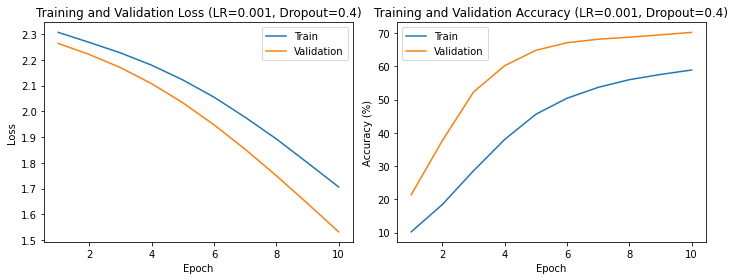

Model - Learning Rate: 0.001, Dropout: 0.6
Epoch 1/10, Train Loss: 2.3063, Val Loss: 2.2652, Train Acc: 11.25%, Val Acc: 28.36%
Model - Learning Rate: 0.001, Dropout: 0.6
Epoch 2/10, Train Loss: 2.2717, Val Loss: 2.2288, Train Acc: 20.04%, Val Acc: 47.96%
Model - Learning Rate: 0.001, Dropout: 0.6
Epoch 3/10, Train Loss: 2.2378, Val Loss: 2.1853, Train Acc: 28.79%, Val Acc: 54.89%
Model - Learning Rate: 0.001, Dropout: 0.6
Epoch 4/10, Train Loss: 2.1978, Val Loss: 2.1307, Train Acc: 35.05%, Val Acc: 57.02%
Model - Learning Rate: 0.001, Dropout: 0.6
Epoch 5/10, Train Loss: 2.1502, Val Loss: 2.0633, Train Acc: 39.54%, Val Acc: 58.40%
Model - Learning Rate: 0.001, Dropout: 0.6
Epoch 6/10, Train Loss: 2.0945, Val Loss: 1.9831, Train Acc: 41.98%, Val Acc: 59.78%
Model - Learning Rate: 0.001, Dropout: 0.6
Epoch 7/10, Train Loss: 2.0298, Val Loss: 1.8910, Train Acc: 44.27%, Val Acc: 61.83%
Model - Learning Rate: 0.001, Dropout: 0.6
Epoch 8/10, Train Loss: 1.9574, Val Loss: 1.7893, Train Acc: 

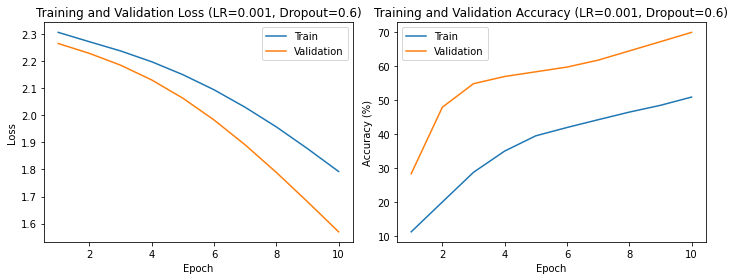

Model - Learning Rate: 0.0005, Dropout: 0.2
Epoch 1/10, Train Loss: 2.3043, Val Loss: 2.2844, Train Acc: 9.59%, Val Acc: 9.68%
Model - Learning Rate: 0.0005, Dropout: 0.2
Epoch 2/10, Train Loss: 2.2849, Val Loss: 2.2654, Train Acc: 10.45%, Val Acc: 11.56%
Model - Learning Rate: 0.0005, Dropout: 0.2
Epoch 3/10, Train Loss: 2.2664, Val Loss: 2.2453, Train Acc: 13.84%, Val Acc: 20.85%
Model - Learning Rate: 0.0005, Dropout: 0.2
Epoch 4/10, Train Loss: 2.2470, Val Loss: 2.2229, Train Acc: 23.10%, Val Acc: 37.38%
Model - Learning Rate: 0.0005, Dropout: 0.2
Epoch 5/10, Train Loss: 2.2253, Val Loss: 2.1973, Train Acc: 36.21%, Val Acc: 53.67%
Model - Learning Rate: 0.0005, Dropout: 0.2
Epoch 6/10, Train Loss: 2.2006, Val Loss: 2.1681, Train Acc: 48.50%, Val Acc: 63.96%
Model - Learning Rate: 0.0005, Dropout: 0.2
Epoch 7/10, Train Loss: 2.1726, Val Loss: 2.1351, Train Acc: 57.05%, Val Acc: 68.24%
Model - Learning Rate: 0.0005, Dropout: 0.2
Epoch 8/10, Train Loss: 2.1407, Val Loss: 2.0983, Train

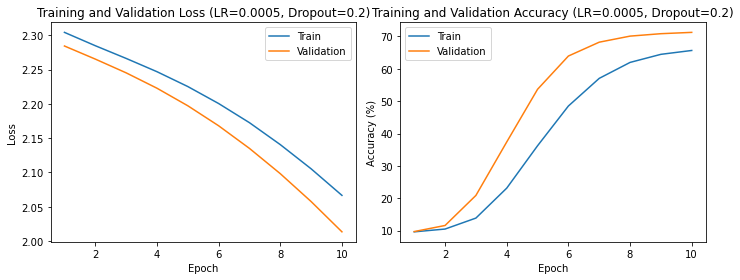

Model - Learning Rate: 0.0005, Dropout: 0.4
Epoch 1/10, Train Loss: 2.3037, Val Loss: 2.2828, Train Acc: 9.71%, Val Acc: 11.53%
Model - Learning Rate: 0.0005, Dropout: 0.4
Epoch 2/10, Train Loss: 2.2851, Val Loss: 2.2625, Train Acc: 14.50%, Val Acc: 23.13%
Model - Learning Rate: 0.0005, Dropout: 0.4
Epoch 3/10, Train Loss: 2.2664, Val Loss: 2.2415, Train Acc: 22.07%, Val Acc: 39.07%
Model - Learning Rate: 0.0005, Dropout: 0.4
Epoch 4/10, Train Loss: 2.2465, Val Loss: 2.2186, Train Acc: 30.02%, Val Acc: 50.50%
Model - Learning Rate: 0.0005, Dropout: 0.4
Epoch 5/10, Train Loss: 2.2249, Val Loss: 2.1929, Train Acc: 36.03%, Val Acc: 56.00%
Model - Learning Rate: 0.0005, Dropout: 0.4
Epoch 6/10, Train Loss: 2.2013, Val Loss: 2.1640, Train Acc: 40.95%, Val Acc: 58.98%
Model - Learning Rate: 0.0005, Dropout: 0.4
Epoch 7/10, Train Loss: 2.1752, Val Loss: 2.1317, Train Acc: 44.22%, Val Acc: 60.49%
Model - Learning Rate: 0.0005, Dropout: 0.4
Epoch 8/10, Train Loss: 2.1459, Val Loss: 2.0958, Trai

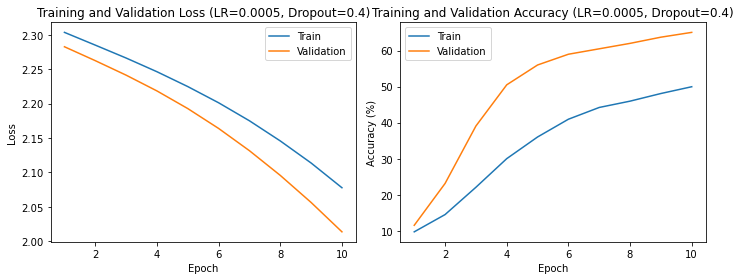

Model - Learning Rate: 0.0005, Dropout: 0.6
Epoch 1/10, Train Loss: 2.3074, Val Loss: 2.2841, Train Acc: 9.36%, Val Acc: 12.46%
Model - Learning Rate: 0.0005, Dropout: 0.6
Epoch 2/10, Train Loss: 2.2881, Val Loss: 2.2632, Train Acc: 12.78%, Val Acc: 25.61%
Model - Learning Rate: 0.0005, Dropout: 0.6
Epoch 3/10, Train Loss: 2.2693, Val Loss: 2.2412, Train Acc: 16.95%, Val Acc: 35.79%
Model - Learning Rate: 0.0005, Dropout: 0.6
Epoch 4/10, Train Loss: 2.2501, Val Loss: 2.2174, Train Acc: 21.57%, Val Acc: 43.58%
Model - Learning Rate: 0.0005, Dropout: 0.6
Epoch 5/10, Train Loss: 2.2287, Val Loss: 2.1912, Train Acc: 25.82%, Val Acc: 51.79%
Model - Learning Rate: 0.0005, Dropout: 0.6
Epoch 6/10, Train Loss: 2.2068, Val Loss: 2.1623, Train Acc: 29.16%, Val Acc: 54.28%
Model - Learning Rate: 0.0005, Dropout: 0.6
Epoch 7/10, Train Loss: 2.1825, Val Loss: 2.1304, Train Acc: 31.94%, Val Acc: 55.18%
Model - Learning Rate: 0.0005, Dropout: 0.6
Epoch 8/10, Train Loss: 2.1542, Val Loss: 2.0954, Trai

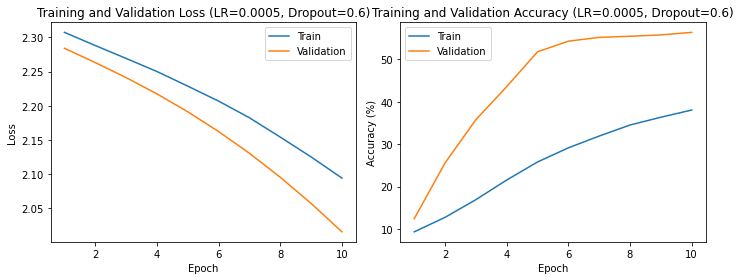

Model - Learning Rate: 0.0001, Dropout: 0.2
Epoch 1/10, Train Loss: 2.3035, Val Loss: 2.3005, Train Acc: 9.27%, Val Acc: 9.91%
Model - Learning Rate: 0.0001, Dropout: 0.2
Epoch 2/10, Train Loss: 2.2997, Val Loss: 2.2964, Train Acc: 10.20%, Val Acc: 10.97%
Model - Learning Rate: 0.0001, Dropout: 0.2
Epoch 3/10, Train Loss: 2.2957, Val Loss: 2.2922, Train Acc: 11.40%, Val Acc: 12.27%
Model - Learning Rate: 0.0001, Dropout: 0.2
Epoch 4/10, Train Loss: 2.2915, Val Loss: 2.2880, Train Acc: 12.97%, Val Acc: 13.83%
Model - Learning Rate: 0.0001, Dropout: 0.2
Epoch 5/10, Train Loss: 2.2872, Val Loss: 2.2837, Train Acc: 14.55%, Val Acc: 15.87%
Model - Learning Rate: 0.0001, Dropout: 0.2
Epoch 6/10, Train Loss: 2.2833, Val Loss: 2.2793, Train Acc: 16.44%, Val Acc: 18.35%
Model - Learning Rate: 0.0001, Dropout: 0.2
Epoch 7/10, Train Loss: 2.2791, Val Loss: 2.2749, Train Acc: 18.08%, Val Acc: 21.19%
Model - Learning Rate: 0.0001, Dropout: 0.2
Epoch 8/10, Train Loss: 2.2747, Val Loss: 2.2703, Train

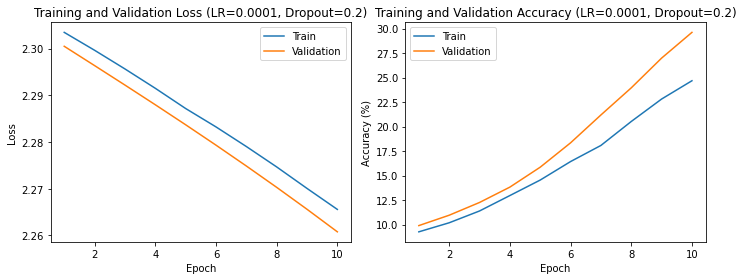

Model - Learning Rate: 0.0001, Dropout: 0.4
Epoch 1/10, Train Loss: 2.3069, Val Loss: 2.3018, Train Acc: 10.02%, Val Acc: 12.47%
Model - Learning Rate: 0.0001, Dropout: 0.4
Epoch 2/10, Train Loss: 2.3028, Val Loss: 2.2975, Train Acc: 11.14%, Val Acc: 15.05%
Model - Learning Rate: 0.0001, Dropout: 0.4
Epoch 3/10, Train Loss: 2.2987, Val Loss: 2.2933, Train Acc: 12.58%, Val Acc: 18.00%
Model - Learning Rate: 0.0001, Dropout: 0.4
Epoch 4/10, Train Loss: 2.2951, Val Loss: 2.2891, Train Acc: 13.92%, Val Acc: 20.33%
Model - Learning Rate: 0.0001, Dropout: 0.4
Epoch 5/10, Train Loss: 2.2908, Val Loss: 2.2850, Train Acc: 15.54%, Val Acc: 22.61%
Model - Learning Rate: 0.0001, Dropout: 0.4
Epoch 6/10, Train Loss: 2.2870, Val Loss: 2.2808, Train Acc: 17.08%, Val Acc: 24.48%
Model - Learning Rate: 0.0001, Dropout: 0.4
Epoch 7/10, Train Loss: 2.2831, Val Loss: 2.2766, Train Acc: 18.75%, Val Acc: 26.89%
Model - Learning Rate: 0.0001, Dropout: 0.4
Epoch 8/10, Train Loss: 2.2793, Val Loss: 2.2723, Tra

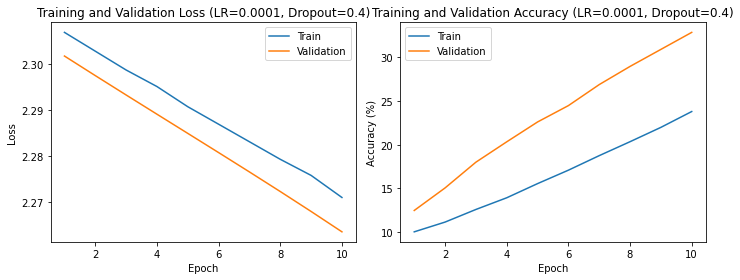

Model - Learning Rate: 0.0001, Dropout: 0.6
Epoch 1/10, Train Loss: 2.3097, Val Loss: 2.3038, Train Acc: 10.66%, Val Acc: 10.63%
Model - Learning Rate: 0.0001, Dropout: 0.6
Epoch 2/10, Train Loss: 2.3065, Val Loss: 2.2997, Train Acc: 11.25%, Val Acc: 14.21%
Model - Learning Rate: 0.0001, Dropout: 0.6
Epoch 3/10, Train Loss: 2.3020, Val Loss: 2.2957, Train Acc: 12.26%, Val Acc: 17.77%
Model - Learning Rate: 0.0001, Dropout: 0.6
Epoch 4/10, Train Loss: 2.2987, Val Loss: 2.2918, Train Acc: 12.68%, Val Acc: 20.73%
Model - Learning Rate: 0.0001, Dropout: 0.6
Epoch 5/10, Train Loss: 2.2951, Val Loss: 2.2879, Train Acc: 13.67%, Val Acc: 23.53%
Model - Learning Rate: 0.0001, Dropout: 0.6
Epoch 6/10, Train Loss: 2.2916, Val Loss: 2.2840, Train Acc: 14.54%, Val Acc: 26.04%
Model - Learning Rate: 0.0001, Dropout: 0.6
Epoch 7/10, Train Loss: 2.2880, Val Loss: 2.2801, Train Acc: 15.28%, Val Acc: 28.22%
Model - Learning Rate: 0.0001, Dropout: 0.6
Epoch 8/10, Train Loss: 2.2847, Val Loss: 2.2763, Tra

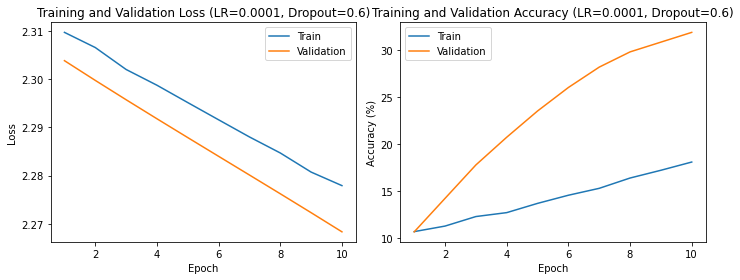

In [32]:
# Define the hyperparameters
learning_rates = [0.001, 0.0005, 0.0001]
dropout_probs = [0.2, 0.4, 0.6]

# Train three additional models with different hyperparameters
for lr in learning_rates:
    for dropout_prob in dropout_probs:
        # Create an instance of the neural network with Dropout and Layer Normalization
        model = ModifiedNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size, dropout_prob)

        # Define the optimizer, learning rate, and loss function
        optimizer = optim.Adam(model.parameters(), lr=lr)
        loss_fn = nn.CrossEntropyLoss()

        # Training loop
        num_epochs = 10
        train_loss_history = []
        val_loss_history = []
        train_acc_history = []
        val_acc_history = []

        for epoch in range(num_epochs):
            train_loss = 0.0
            train_total = 0
            train_correct = 0

            # Training phase
            model.train()
            optimizer.zero_grad()
            outputs = model(train_features)
            loss = loss_fn(outputs, train_labels)
            loss.backward()
            optimizer.step()

            train_loss = loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_total = train_labels.size(0)
            train_correct = (predicted == train_labels).sum().item()

            # Validation phase
            model.eval()
            with torch.no_grad():
                outputs = model(val_features)
                loss = loss_fn(outputs, val_labels)

                val_loss = loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total = val_labels.size(0)
                val_correct = (predicted == val_labels).sum().item()

            # Calculate metrics
            train_accuracy = 100.0 * train_correct / train_total
            val_accuracy = 100.0 * val_correct / val_total

            # Save metrics for plotting
            train_loss_history.append(train_loss)
            val_loss_history.append(val_loss)
            train_acc_history.append(train_accuracy)
            val_acc_history.append(val_accuracy)

            # Print progress
            print(f"Model - Learning Rate: {lr}, Dropout: {dropout_prob}")
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
                  f"Train Acc: {train_accuracy:.2f}%, Val Acc: {val_accuracy:.2f}%")

        # Plotting the training/validation loss and accuracy for each model
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.plot(range(1, num_epochs+1), train_loss_history, label='Train')
        plt.plot(range(1, num_epochs+1), val_loss_history, label='Validation')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Training and Validation Loss (LR={lr}, Dropout={dropout_prob})')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(1, num_epochs+1), train_acc_history, label='Train')
        plt.plot(range(1, num_epochs+1), val_acc_history, label='Validation')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.title(f'Training and Validation Accuracy (LR={lr}, Dropout={dropout_prob})')
        plt.legend()

        plt.tight_layout()
        plt.show()
